In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:

from configuration import *
from qm.QuantumMachinesManager import QuantumMachinesManager
from qm import LoopbackInterface
from qm import SimulationConfig
from qm.qua import *
import numpy as np
import matplotlib.pyplot as plt

# Coupling a Superconducting Qubit to a Left-Handed Metamaterial Resonator

This notebook demonstrates usage of QUA to implement work published in https://doi.org/10.1103/PhysRevApplied.14.064033

The system under consideration is a flux tuneable superconducting qubit that is coupled to a specially engineered readout resonator. 
The readout resonator is built such that the refractive index of one part of it is negative. This is called a Left Handed resonator. The interaction between different types of resonators creates a tightly spaced resonator mode structure. 

The paper demonstrates how strong interaction between resonator modes and the qubit is acheived. 


## Figure number 1

The first thing demostrated is a resonator spectroscopy measurement, showing the unique mode structure.
This is the code needed to do this in QUA: 

2021-01-24 11:42:45,595 - qm - INFO - Performing health check
2021-01-24 11:42:45,749 - qm - INFO - Health check passed
2021-01-24 11:42:45,963 - qm - INFO - to simulate a program, use QuantumMachinesManager.simulate(..)
2021-01-24 11:42:46,001 - qm - INFO - Flags: 
2021-01-24 11:42:46,001 - qm - INFO - Simulating Qua program


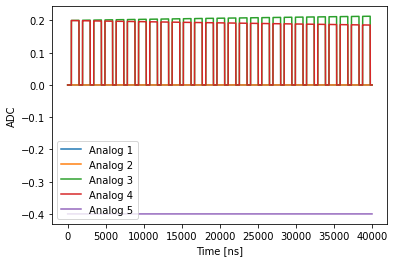

In [5]:
from configuration import *
qm1 = QuantumMachinesManager()
QM = qm1.open_qm(config)
with program() as prog:
    f = declare(int)
    I =  declare(fixed)
    Q =  declare(fixed)
    I_str=declare_stream()
    Q_str=declare_stream()
    
    with for_(f,-300,f<300,f+1):
        update_frequency('RR',f)
        measure('measure','RR',None,demod.full('integW1',I),demod.full('integW2',Q))
        save(I,I_str)
        save(Q,Q_str)
    
    with stream_processing():
        I_str.save_all('I')
        Q_str.save_all('Q')
    
sim_time = 10000
job=QM.simulate(prog,SimulationConfig(sim_time))        
res = job.result_handles
I=res.I.fetch_all()['value']
Q=res.Q.fetch_all()['value']
Power = np.sqrt(I**2+Q**2) 
samples = job.get_simulated_samples()
samples.con1.plot()

# Figure 2

2021-01-24 11:46:44,851 - qm - INFO - Performing health check
2021-01-24 11:46:44,854 - qm - INFO - Health check passed
2021-01-24 11:46:44,883 - qm - INFO - to simulate a program, use QuantumMachinesManager.simulate(..)
2021-01-24 11:46:44,899 - qm - INFO - Flags: 
2021-01-24 11:46:44,899 - qm - INFO - Simulating Qua program


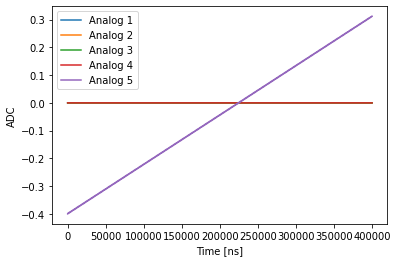

In [9]:

from configuration import *
qm1 = QuantumMachinesManager()
config['pulses']['constPulse']['length']=1500

QM = qm1.open_qm(config)
with program() as prog:
    f = declare(int)
    flux = declare(fixed)
    ind = declare(int)
    I =  declare(fixed)
    Q =  declare(fixed)
    I_str=declare_stream()
    Q_str=declare_stream()
    
    with for_(ind,0,ind<300,ind+1):
        play('tune','flux_line')
#         with for_(f,-300,f<300,f+1):
#             update_frequency('RR',f)
#             play('flux_line')
#             measure('measure','RR',None,demod.full('integW1',I),demod.full('integW2',Q))
#             save(I,I_str)
#             save(Q,Q_str)

#     with stream_processing():
#         I_str.save_all('I')
#         Q_str.save_all('Q')
    
sim_time = 100000
job=QM.simulate(prog,SimulationConfig(sim_time))        
# res = job.result_handles
# I=res.I.fetch_all()['value']
# Q=res.Q.fetch_all()['value']
# Power = np.sqrt(I**2+Q**2) 
samples = job.get_simulated_samples()
samples.con1.plot()